# Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Copy data zip files to Colab working space

In [ ]:
!cp -r '/content/drive/MyDrive/fish_data_small.zip' fish_data_small.zip
!cp -r '/content/drive/MyDrive/fish_data.zip' fish_data.zip

# Extract zip files

In [ ]:
!unzip /content/fish_data_small.zip
!unzip /content/fish_data.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (88).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (89).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (9).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (90).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (91).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (92).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (93).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (94).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (95).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (96).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (97).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (98).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤1 (99).jpg  
  inflating: fish_data/train/2_Thom_bang_yi/ьПиы▒ЕьЭ┤6 (1).jpg  
  inflating: fish_data/train/2_Thom_bang_y

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import backend as K

In [ ]:
# // train_data path
train_path = "/content/fish_data_small/train/"
#// test_data path
test_path="/content/fish_data_small/test/"

# Get the data labels

In [ ]:
labels=[]
label_paths = glob.glob(train_path+"*")
for t_path in label_paths:
    labels.append(t_path[len(train_path):])
labels.sort()

#라벨들을 프린트 하시오
print(labels)

['10_Kanari', '1_Ko_dung_uh', '2_Thom_bang_yi', '3_Bang_uh_dom', '4_Bum-dom', '5_Yong-chi', '6_Cham_dom', '7_Jul_jun', '8_Gam_sung_dom', '9_Nong_uh']


# Load training data

In [ ]:
picture_size = 150
train_data = []
train_data_label =[]

for label in labels:
    print (label)
    img_files = glob.glob(train_path+label+"/*.*")
    num_label = labels.index(label)
    print("data size for " + label + " : " + str(len(img_files)))
    for img_file in img_files:
        #print("loading "+img_file)
        img = cv2.imread(img_file)
        img = cv2.resize(img,(picture_size,picture_size))
        train_data.append(img)
        train_data_label.append(num_label)

10_Kanari
data size for 10_Kanari : 200
1_Ko_dung_uh
data size for 1_Ko_dung_uh : 200
2_Thom_bang_yi
data size for 2_Thom_bang_yi : 200
3_Bang_uh_dom
data size for 3_Bang_uh_dom : 200
4_Bum-dom
data size for 4_Bum-dom : 200
5_Yong-chi
data size for 5_Yong-chi : 200
6_Cham_dom
data size for 6_Cham_dom : 200
7_Jul_jun
data size for 7_Jul_jun : 200
8_Gam_sung_dom
data size for 8_Gam_sung_dom : 200
9_Nong_uh
data size for 9_Nong_uh : 200


Label:  5_Yong-chi


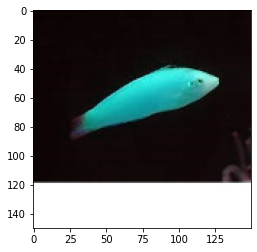

In [ ]:
plt.imshow(train_data[1000])
print("Label: ", labels[train_data_label[1000]])
plt.show()

In [ ]:
len(train_data)

2000

In [ ]:
train_data[0].shape

(150, 150, 3)

# Load test data

In [ ]:
picture_size = 150
test_data = []
test_data_label =[]

#test_data와 test_data_label에 적절한 데이터를 채우시오 (train_data 참고)
for label in labels :
  print(label)
  img_files = glob.glob(test_path+label+"/*.*")
  num_label = labels.index(label)
  print("data size for " + label + " : " + str(len(img_files)))
  for img_file in img_files:
      img = cv2.imread(img_file)
      img = cv2.resize(img, (picture_size, picture_size))
      test_data.append(img)
      test_data_label.append(num_label)

10_Kanari
data size for 10_Kanari : 20
1_Ko_dung_uh
data size for 1_Ko_dung_uh : 20
2_Thom_bang_yi
data size for 2_Thom_bang_yi : 20
3_Bang_uh_dom
data size for 3_Bang_uh_dom : 20
4_Bum-dom
data size for 4_Bum-dom : 20
5_Yong-chi
data size for 5_Yong-chi : 20
6_Cham_dom
data size for 6_Cham_dom : 20
7_Jul_jun
data size for 7_Jul_jun : 20
8_Gam_sung_dom
data size for 8_Gam_sung_dom : 20
9_Nong_uh
data size for 9_Nong_uh : 20


In [ ]:
len(test_data)

200

In [ ]:
test_data[0].shape

(150, 150, 3)

# Data preparation

In [ ]:
x = np.array(train_data)
y = np.array(train_data_label)

#train_test_split를 이용하여 훈련데이터셋과 검증데이터셋으로 나누기. 검증데이터셋 20%, 인자로 random_state = 230 지정
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 230)
Y_train = to_categorical(y_train, len(labels))
Y_val = to_categorical(y_val, len(labels))

#test_data[]와 test_data_lable[]을 이용하여 테스트셋 생성
X_test = np.array(test_data)
y_test = np.array(test_data_label)
Y_test = to_categorical(y_test, len(labels))

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
# for training data, we apply normalize, randomly rotate, shift and flip, etc.

val_test_datagen = ImageDataGenerator(rescale=1./255.)
# for validation and test sets, we only normalize

train_generator = train_datagen.flow(X_train,Y_train,batch_size=64)
validation_generator = val_test_datagen.flow(X_val,Y_val,batch_size=64)
test_generator = val_test_datagen.flow(X_test,Y_test,batch_size=64)

# Build model

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
# by setting weights='imagenet', we load pre-trained weights (trained with ImageNet data) into VGG16 model.
# by setting include_top=False, we only use part of VGG16 architecture up to the last pooling layer

conv_base.trainable = False  # Freeze weights of conv_base layers (VGG16)

#Sequential()을 이용하여 model 초기화
model = models.Sequential()

#model에 베이스모델 추가
model.add(conv_base)

#model 에 Flatten층 추가
model.add(layers.Flatten())

#model에 dense 층 추가, 뉴런 256개, 활성화함수 relu
model.add(layers.Dense(256, activation='relu'))

#model에 dense 층 추가, 뉴런 10개, 활성화함수 softmax
model.add(layers.Dense(10, activation='softmax'))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


# Train model

In [ ]:
#model compile 하기,optimizer는 RMSprop, 학습률 1e-3, 손실함수 categorical_crossentropy, metric acc
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-3),
              loss = 'categorical_crossentropy',
              metrics=['acc'])

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Colab Notebooks/my_fish_model.h5",
    monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

epoch_num = 20
#모델 훈련 시 콜백함수 등록하여 호출
history = model.fit(train_generator,
      epochs=epoch_num,
      validation_data= validation_generator,
      callbacks=[checkpoint_cb])

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 2.7850 - acc: 0.2988
Epoch 1: val_acc improved from -inf to 0.55000, saving model to /content/drive/My Drive/Colab Notebooks/my_fish_model.h5
25/25 [==============================] - 25s 486ms/step - loss: 2.7850 - acc: 0.2988 - val_loss: 1.4372 - val_acc: 0.5500
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 1.4484 - acc: 0.5088
Epoch 2: val_acc improved from 0.55000 to 0.67750, saving model to /content/drive/My Drive/Colab Notebooks/my_fish_model.h5
25/25 [==============================] - 11s 419ms/step - loss: 1.4484 - acc: 0.5088 - val_loss: 0.9892 - val_acc: 0.6775
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 1.2039 - acc: 0.5863
Epoch 3: val_acc did not improve from 0.67750
25/25 [==============================] - 14s 564ms/step - loss: 1.2039 - acc: 0.5863 - val_loss: 1.4102 - val_acc: 0.4875
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 1.1191 -

In [ ]:
#훈련시 저장된 최상의 모델 복원
model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/my_fish_model.h5")

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 1s 356ms/step - loss: 0.5148 - acc: 0.8300


[0.5147732496261597, 0.8299999833106995]

# Mini-Project

### Quesion 1:

In [ ]:
import os

In [ ]:
run_logdir = os.path.join(os.curdir, "my_logs", "Question 1")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(300, activation="elu", kernel_initializer="he_normal"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.00095, beta_1 = 0.9, beta_2 = 0.999)

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
tf.keras.backend.clear_session()
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["acc"])

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "/content/drive/My Drive/Colab Notebooks/my_fish_model.h5",
    monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

epoch_num = 40
history = model.fit(X_train_scaled, y_train, epochs=epoch_num, validation_data=(X_val_scaled, y_val), callbacks=[checkpoint_cb])

Epoch 1/40
50/50 [==============================] - ETA: 0s - loss: 1.4552 - acc: 0.5750
Epoch 1: val_acc improved from -inf to 0.82250, saving model to /content/drive/My Drive/Colab Notebooks/my_fish_model.h5
50/50 [==============================] - 7s 121ms/step - loss: 1.4552 - acc: 0.5750 - val_loss: 0.5516 - val_acc: 0.8225
Epoch 2/40
50/50 [==============================] - ETA: 0s - loss: 0.5214 - acc: 0.8306
Epoch 2: val_acc improved from 0.82250 to 0.86250, saving model to /content/drive/My Drive/Colab Notebooks/my_fish_model.h5
50/50 [==============================] - 6s 115ms/step - loss: 0.5214 - acc: 0.8306 - val_loss: 0.4498 - val_acc: 0.8625
Epoch 3/40
50/50 [==============================] - ETA: 0s - loss: 0.2594 - acc: 0.9156
Epoch 3: val_acc improved from 0.86250 to 0.88500, saving model to /content/drive/My Drive/Colab Notebooks/my_fish_model.h5
50/50 [==============================] - 6s 116ms/step - loss: 0.2594 - acc: 0.9156 - val_loss: 0.3660 - val_acc: 0.8850
E

In [ ]:
model = tf.keras.models.load_model("/content/drive/My Drive/Colab Notebooks/my_fish_model.h5")

In [ ]:
model.evaluate(X_test_scaled, y_test)

7/7 [==============================] - 1s 76ms/step - loss: 0.4964 - acc: 0.8800


[0.49635323882102966, 0.8799999952316284]